# 🧠 Day 3 – SQL via Python: NYC School Data Exploration
In this notebook, you'll connect to a PostgreSQL database and execute SQL queries to explore NYC school data.

## 🔌 Step 1: Import Libraries

In [1]:
import pandas as pd
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt

## 🔐 Step 2: Connect to the Database

In [2]:
# DB connection setup using hardcoded credentials (for onboarding only)
conn = psycopg2.connect(
    dbname="neondb",
    user="neondb_owner",
    password="npg_CeS9fJg2azZD",
    host="ep-falling-glitter-a5m0j5gk-pooler.us-east-2.aws.neon.tech",
    port="5432",
    sslmode="require"
)
cur = conn.cursor()

## 🔍 Step 3: Run a Test Query

In [3]:
query = "SELECT * FROM nyc_schools.high_school_directory LIMIT 5;"
df = pd.read_sql(query, conn)
df.head()

C:\Users\sulta\AppData\Local\Temp\ipykernel_20616\1731849884.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,number_programs,Location 1,Community Board,Council District,Census Tract,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,None,None,...,1,"{'latitude': '40.601989336', 'longitude': '-73...",14,31,100802,20529,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,None,None,...,1,"{'latitude': '40.593593811', 'longitude': '-73...",13,47,306,17616,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,None,None,...,1,"{'latitude': '40.692133704', 'longitude': '-73...",3,36,291,18181,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,None,None,...,1,"{'latitude': '40.822303765', 'longitude': '-73...",9,18,16,11611,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,None,None,...,6,"{'latitude': '40.773670507', 'longitude': '-73...",7,6,151,12420,20,4,19,12


## ✅ Task Queries Below

In [4]:
# Example: Count schools by borough
query = """
SELECT borough, COUNT(*) AS school_count
FROM nyc_schools.high_school_directory
GROUP BY borough;
"""
df_result = pd.read_sql(query, conn)
df_result

C:\Users\sulta\AppData\Local\Temp\ipykernel_20616\3450537001.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_result = pd.read_sql(query, conn)


,borough,school_count
0,Brooklyn,121
1,Queens,80
2,Staten Island,10
3,Manhattan,106
4,Bronx,118


In [5]:
# How many schools are there in each borough?
query = """
SELECT borough, COUNT(DISTINCT dbn) AS school_count
 FROM nyc_schools.high_school_directory
 GROUP BY borough
 ORDER BY school_count DESC
"""

df_result = pd.read_sql(query, conn)
df_result

C:\Users\sulta\AppData\Local\Temp\ipykernel_20616\3123187258.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_result = pd.read_sql(query, conn)


,borough,school_count
0,Brooklyn,121
1,Bronx,118
2,Manhattan,106
3,Queens,80
4,Staten Island,10


In [6]:
# What is the average % of English Language Learners (ELL) per borough?
query = """
SELECT 
	dir.borough, 
	ROUND (AVG(dem.ell_percent)) || '%' AS avg_ell_percent
FROM nyc_schools.high_school_directory AS dir
INNER JOIN nyc_schools.school_demographics AS dem ON dir.dbn=dem.dbn
GROUP BY dir.borough
"""

df_result = pd.read_sql(query, conn)
df_result

C:\Users\sulta\AppData\Local\Temp\ipykernel_20616\2010515130.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_result = pd.read_sql(query, conn)


,borough,avg_ell_percent
0,Manhattan,8%


In [7]:
# Using the data from the school demographics and high school directory, write a query to find the  top 3 schools in each borough with the highest percentage of special education students (sped_percent)
query = """
WITH rank_cte AS (
  SELECT dir.borough, dir.dbn, dem.sped_percent, dem.schoolyear,
	ROW_NUMBER () OVER (PARTITION BY dir.borough ORDER BY dem.sped_percent DESC) AS rank
	FROM nyc_schools.high_school_directory AS dir
	INNER JOIN nyc_schools.school_demographics dem ON dem.dbn=dir.dbn
	WHERE 1=1
		AND dem.sped_percent IS NOT NULL
		AND borough IS NOT NULL
		AND dem.sped_percent > 0
  )
 SELECT borough, dbn, sped_percent, schoolyear
 FROM rank_cte
 WHERE rank <4
 ORDER BY borough, sped_percent DESC
"""

df_result = pd.read_sql(query, conn)
df_result

C:\Users\sulta\AppData\Local\Temp\ipykernel_20616\743063128.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_result = pd.read_sql(query, conn)


,borough,dbn,sped_percent,schoolyear
0,Manhattan,01M450,28.8,20092010
1,Manhattan,01M450,27.7,20102011
2,Manhattan,01M450,26.7,20082009


In [8]:
# Taking the average of sped_percent in order to find the top 3 schools in each borough with the highest percentage of special education students (sped_percent) for all years

query = """
WITH dem_cte AS (
  SELECT dbn,  AVG (sped_percent) AS sped_percent
	FROM nyc_schools.school_demographics
	GROUP BY dbn
),
rank_cte AS (
  SELECT dir.borough, dir.dbn,  dem.sped_percent,
	ROW_NUMBER () OVER (PARTITION BY dir.borough ORDER BY dem.sped_percent DESC) AS rank
	FROM nyc_schools.high_school_directory AS dir
	INNER JOIN dem_cte dem ON dem.dbn=dir.dbn  
	WHERE 1=1
		AND dem.sped_percent IS NOT NULL
		AND borough IS NOT NULL
		AND dem.sped_percent > 0
  )
 SELECT borough, dbn, ROUND(sped_percent) AS sped_percent
 FROM rank_cte
 WHERE rank <4
 ORDER BY borough, sped_percent DESC

"""

df_result = pd.read_sql(query, conn)
df_result

C:\Users\sulta\AppData\Local\Temp\ipykernel_20616\1082696198.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_result = pd.read_sql(query, conn)


,borough,dbn,sped_percent
0,Manhattan,01M450,26.0
1,Manhattan,01M292,23.0
2,Manhattan,01M509,22.0


## 🧠 Insights

Write your observations, findings, and answers to the task questions here.

In [9]:

# There is ONLY ONE borough in the dataset that has schools with demographics data.

query = """
SELECT DISTINCT (borough)
FROM nyc_schools.high_school_directory
WHERE dbn IN (
    SELECT dbn
    FROM nyc_schools.school_demographics
    )
"""

df_result = pd.read_sql(query, conn)
df_result

C:\Users\sulta\AppData\Local\Temp\ipykernel_20616\888996473.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_result = pd.read_sql(query, conn)


,borough
0,Manhattan


C:\Users\sulta\AppData\Local\Temp\ipykernel_20616\4053327150.py:49: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_result = pd.read_sql(query, conn)


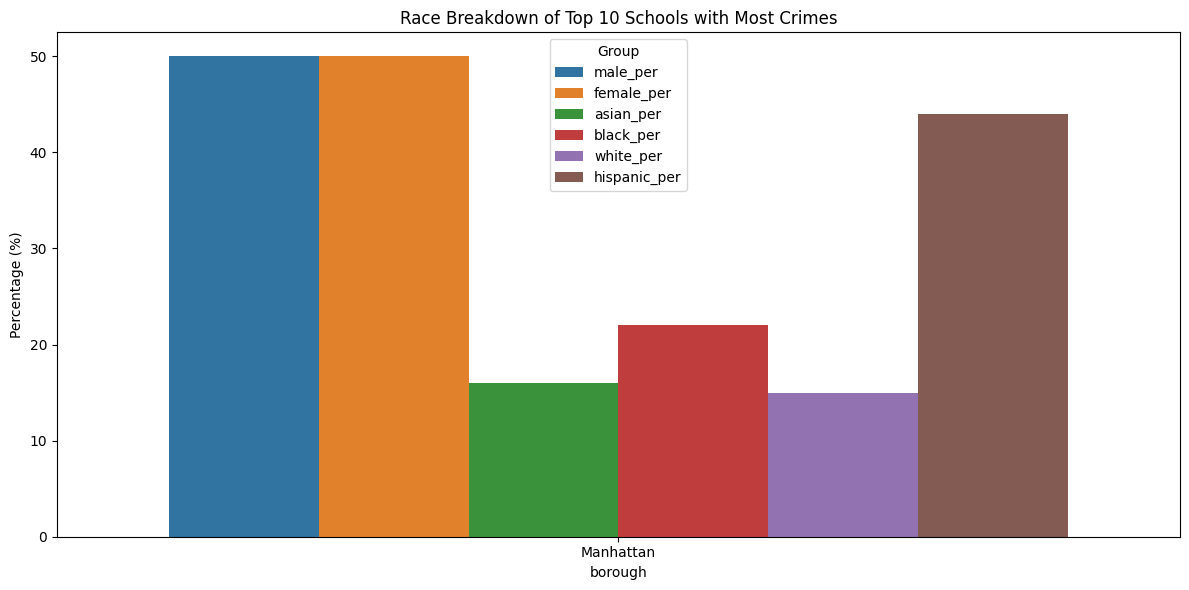

In [10]:
# On the average schools with asians and white percentage have lower crime rates
# Additionally hispanic percentage is more in schools with higher crime rates
query = """


WITH crimes_cte AS (
  SELECT 
    dbn, 
    COALESCE(major_n, 0) 
    + 	COALESCE(oth_n, 0) 
    + 	COALESCE(nocrim_n, 0) 
    + 	COALESCE(prop_n, 0) 
    + 	COALESCE(vio_n, 0)
    AS n_crimes
  FROM 
  	nyc_schools.school_safety_report
  ),
gender_cte AS (
  SELECT 
      dbn, 
      COALESCE(male_per, 0) AS male_per,
      COALESCE(female_per, 0) AS female_per,
  		COALESCE(asian_per, 0) AS asian_per,
  		COALESCE(black_per, 0) AS black_per,
  		COALESCE(white_per, 0) AS white_per,
      COALESCE(hispanic_per, 0) AS hispanic_per  
    FROM 
      nyc_schools.school_demographics
)
    
SELECT 
	dir.borough, 
  ROUND (AVG (gen.male_per)) AS male_per, 
  ROUND (AVG (gen.female_per)) AS female_per, 
  ROUND (AVG (gen.asian_per)) AS asian_per,
  ROUND (AVG (gen.black_per)) AS black_per,
  ROUND (AVG (gen.white_per)) AS white_per,
  ROUND (AVG (gen.hispanic_per)) AS hispanic_per,
  SUM(cr.n_crimes) AS n_crimes
FROM nyc_schools.high_school_directory dir
INNER JOIN gender_cte AS gen ON gen.dbn = dir.dbn
INNER JOIN crimes_cte AS cr ON cr.dbn = dir.dbn
GROUP BY 1
ORDER BY n_crimes DESC


"""

df_result = pd.read_sql(query, conn)


top10 = df_result.sort_values('n_crimes', ascending=False).head(10)

top10_melted = top10.melt(
    id_vars=['borough', 'n_crimes'],
    value_vars=['male_per', 'female_per', 'asian_per', 'black_per', 'white_per', 'hispanic_per'],
    var_name='group',
    value_name='percentage'
)

plt.figure(figsize=(12, 6))
sns.barplot(data=top10_melted, x='borough', y='percentage', hue='group')
plt.title('Race Breakdown of Top 10 Schools with Most Crimes')
plt.xticks(rotation=0)
plt.ylabel('Percentage (%)')
plt.legend(title='Group')
plt.tight_layout()
plt.show()


In [11]:
df_result

,borough,male_per,female_per,asian_per,black_per,white_per,hispanic_per,n_crimes
0,Manhattan,50.0,50.0,16.0,22.0,15.0,44.0,453.0
